### Import libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import namedtuple
from scipy.signal import butter, filtfilt
from scipy.io import loadmat
from collections import namedtuple
from math import floor
from scipy import stats
import antropy as ant


import pywt
import warnings
from vmdpy import VMD
from scipy.signal import periodogram

### Read and preprocess data

In [10]:
EEG_78_CH2 = pd.read_csv('EEG_78_CH2.csv')
bis_78 = pd.read_csv('bis_78.csv')
B78=bis_78['BIS/BIS']
E78=EEG_78_CH2['BIS/EEG2_WAV']
print ('The shape of EEG signals and BIS for patient 78 is {} and {} '.format(E78.shape,B78.shape) )
print ('The type of EEG signals and BIS for patient 78 is {} and {} '.format(type(E78),type(B78)) )

The shape of EEG signals and BIS for patient 78 is (535191,) and (4180,) 
The type of EEG signals and BIS for patient 78 is <class 'pandas.core.series.Series'> and <class 'pandas.core.series.Series'> 


In [11]:
#checking for missing values

def missing_values(eeg_signal):

    # Check for missing values
    missing_values = np.isnan(eeg_signal)
    length_signals = len(eeg_signal)

    # Count the number of missing values
    num_missing_values = np.sum(missing_values)
    percentage_missing_values = (num_missing_values/length_signals)*100

    # Print the indices and values of missing values
    missing_indices = np.where(missing_values)[0]
    missing_values_list = eeg_signal[missing_indices]

    print("Missing Values:")
    print(f"Total Missing Values: {num_missing_values}")
    print(f"Percentage of Missing Values: {percentage_missing_values} %")  
missing_values(E78)

Missing Values:
Total Missing Values: 167
Percentage of Missing Values: 0.03120381321808476 %


In [12]:
E78_copy = np.copy(E78)

In [13]:
# Handling missing values

def handle_missing_values(signal):
    # Interpolate missing values using linear interpolation
    mask = np.isnan(signal)
    signal[mask] = np.interp(np.flatnonzero(mask), np.flatnonzero(~mask), signal[~mask])
    return signal
handle_missing_values(E78_copy)

array([-5.6, -5.6, -5.6, ..., -6.5, -6.5, -6.5])

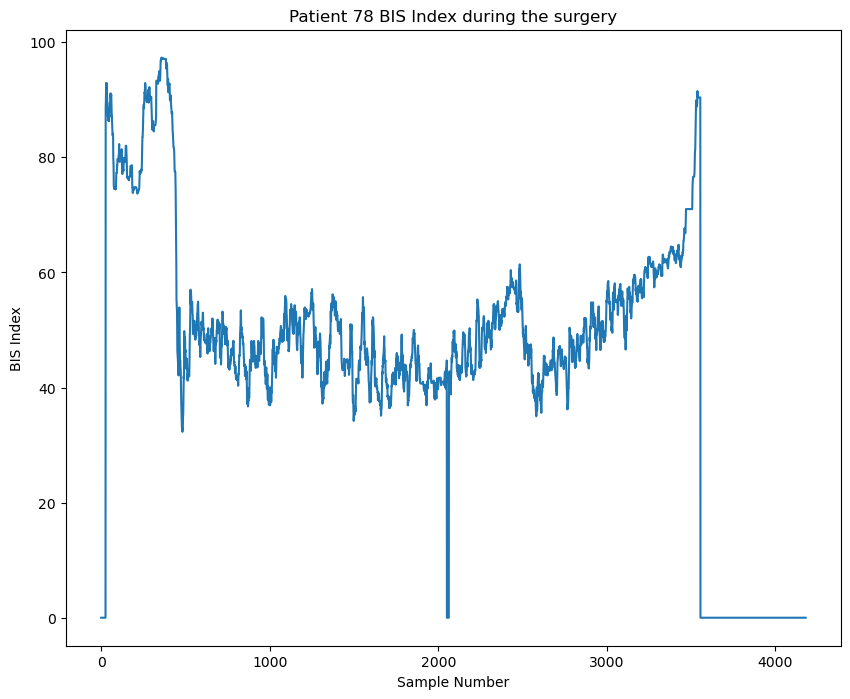

In [14]:
# Patient 78 BIS values throughout the surgery
fig = plt.figure(figsize=(10, 8))
plt.plot(B78)
plt.xlabel("Sample Number")
plt.ylabel("BIS Index")
plt.title("Patient 78 BIS Index during the surgery")
plt.show()

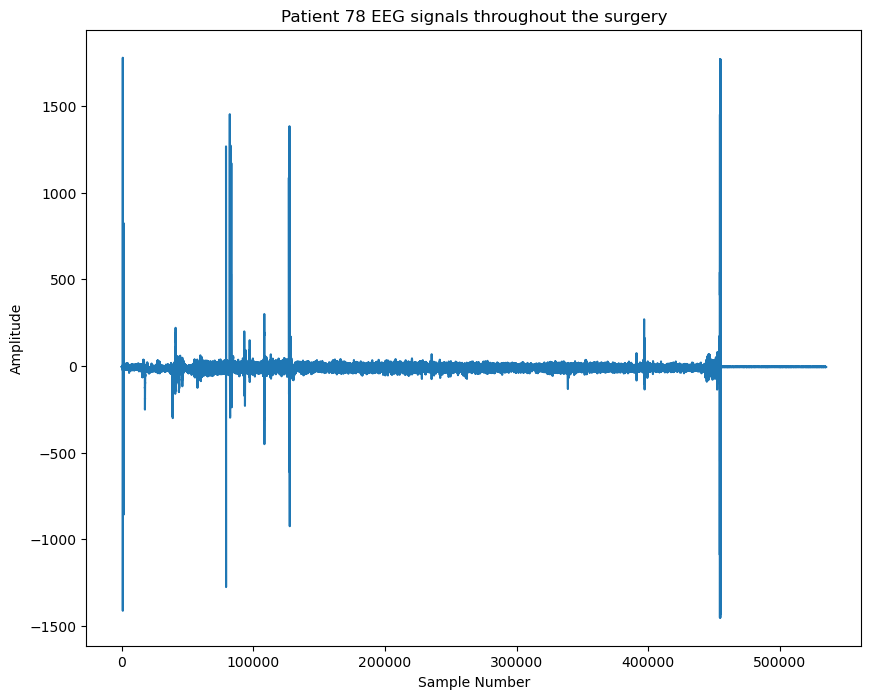

In [15]:
# Patient 78 EEG signals throughout the surgery
fig = plt.figure(figsize=(10, 8))
plt.plot(E78_copy)
plt.xlabel("Sample Number")
plt.ylabel("Amplitude")
plt.title("Patient 78 EEG signals throughout the surgery")
plt.show()

### Selecting EEG signals

In [16]:
import numpy as np

# Assuming BIS and EEG are numpy arrays
BIS = B78
EEG = E78_copy

# Define the sampling frequency
fs = 128

# Define the indices for BIS range from 200 to 800
bis_start_index = 200
bis_end_index = 800

# Convert the BIS indices to EEG indices

eeg_start_index = bis_start_index * fs
eeg_end_index = bis_end_index * fs

# Select EEG values for BIS[200:800]
selected_EEG = EEG[eeg_start_index:eeg_end_index]
selected_bis = BIS[bis_start_index:bis_end_index]
selected_bis = np.array(selected_bis)
print(selected_EEG)


[-14.8  -12.6  -13.1  ... -21.3  -21.8  -20.45]


In [17]:
Give a working python code to select

SyntaxError: invalid syntax (1314212650.py, line 1)

In [18]:
#bandpass filter

# Define the EEG signal
eeg_signal = selected_EEG # Replace with your actual EEG signal


# Define the frequency bands
low = 8
high = 13
fs=128

# Define the filter function
def bandpass_filter(signal, lowcut, highcut, fs, order=3):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    filtered_signal = filtfilt(b, a, signal)
    return filtered_signal

# Apply bandpass filters to the EEG signal
  
bpass = bandpass_filter(eeg_signal, 0.01, 63.5, fs)



# Plot the original and filtered signals
time = np.arange(len(eeg_signal)) / fs

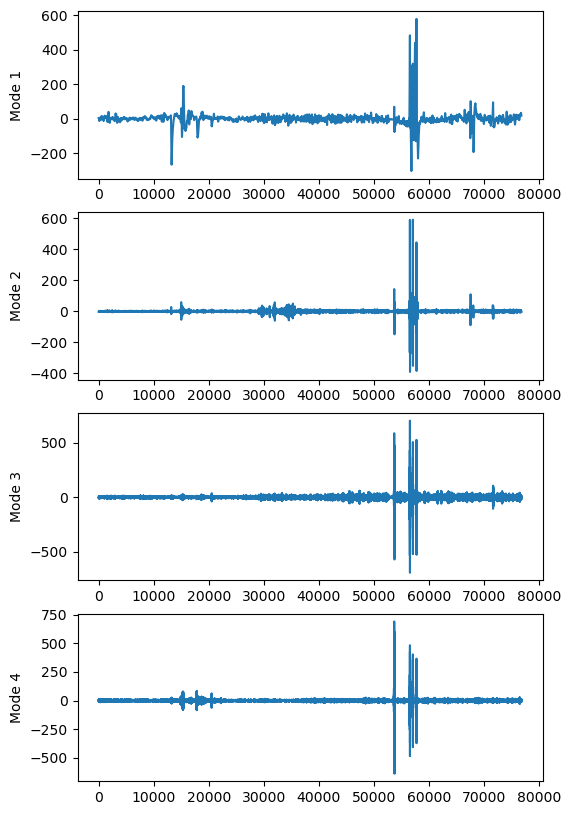

In [19]:
# VMD

import numpy as np
from vmdpy import VMD

signal = bpass

# Set VMD parameters
alpha = 20000
tau = 0.5
K = 4
DC = False
init = "svd"           # initialize omegas uniformly  
tol = 1e-7 

# Run VMD on the signal
modes, spectrum, omega =VMD (signal, alpha, tau, K, DC, init,tol)

#Plot the decomposed modes
import matplotlib.pyplot as plt
fig, axs = plt.subplots(K, 1, figsize=(6, 10))
for i in range(K):
    axs[i].plot(modes[i, :])
    axs[i].set_ylabel(f"Mode {i+1}")
plt.show()

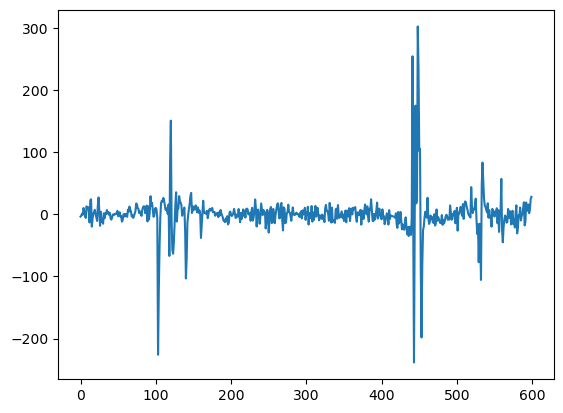

In [27]:
import numpy as np

# Assuming EEG is a numpy array with shape (535191,)
EEG = modes[0]

# Define the window size
window_size = 128

# Calculate the number of windows
num_windows = len(EEG) // window_size

# Reshape the EEG signal into windows
EEG_windows = np.reshape(EEG[:num_windows * window_size], (num_windows, window_size))

# Calculate the mean of each window
mean_values = np.mean(EEG_windows, axis=1)
plt.plot(mean_values)

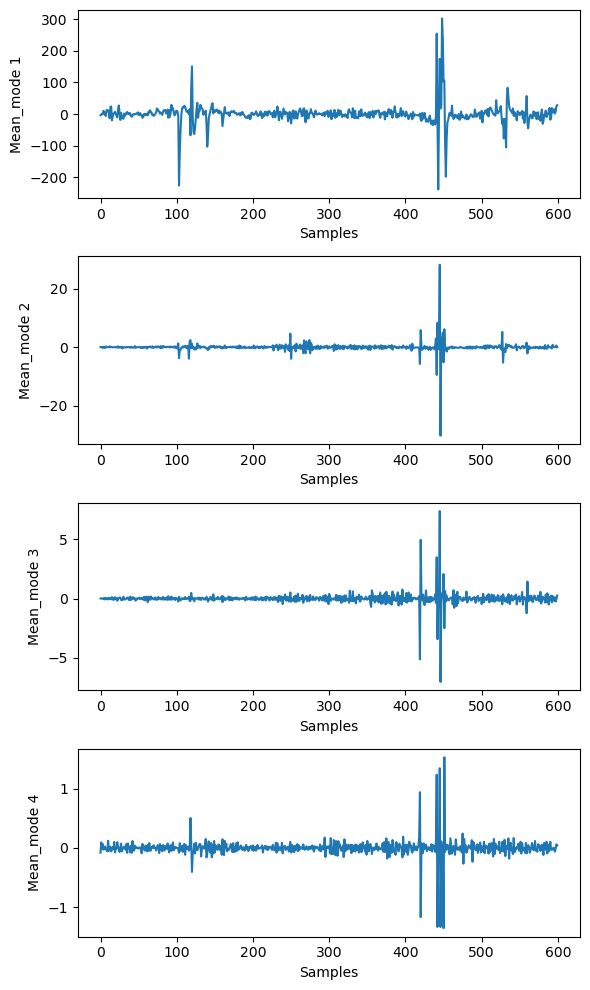

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some example data

combined_data = modes  # Example data with shape (6, 1500)
#titles = ['Mean 1', 'Mean 2', 'Mean 3', 'Mean 4', 'Mean 5', 'Mean 6']

# Calculate mean values for every 128 values
mean_values = np.mean(combined_data.reshape(4, -1, 128), axis=2)

# Create a figure with subplots
fig, axs = plt.subplots(4, 1, figsize=(6, 10))


# Iterate over the variables and plot mean values in subplots
for i in range(4):
    axs[i].plot(mean_values[i])
    #axs[i].set_title(titles[i])
    axs[i].set_xlabel('Samples')
    axs[i].set_ylabel(f'Mean_mode {i+1}')
# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


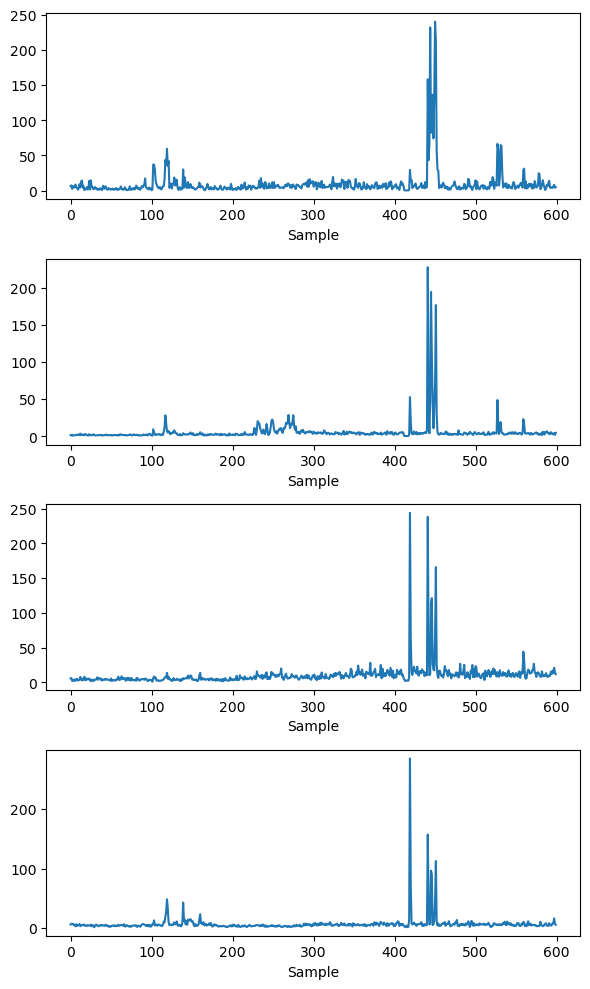

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some example data

combined_data = modes  # Example data with shape (4, 1500)

#titles = ['Std 1', 'Std 2', 'Std 3', 'Std 4', 'Std 5', 'Std 6']

# Calculate mean values for every 128 values
std_values = np.std(combined_data.reshape(4, -1, 128), axis=2)

# Create a figure with subplots
fig, axs = plt.subplots(4, 1, figsize=(6, 10))

# Iterate over the variables and plot mean values in subplots
for i in range(4):
    axs[i].plot(std_values[i])
    #axs[i].set_title(titles[i])
    axs[i].set_xlabel('Sample')
    #axs[i].set_ylabel(f'Std_mode {i+1}')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


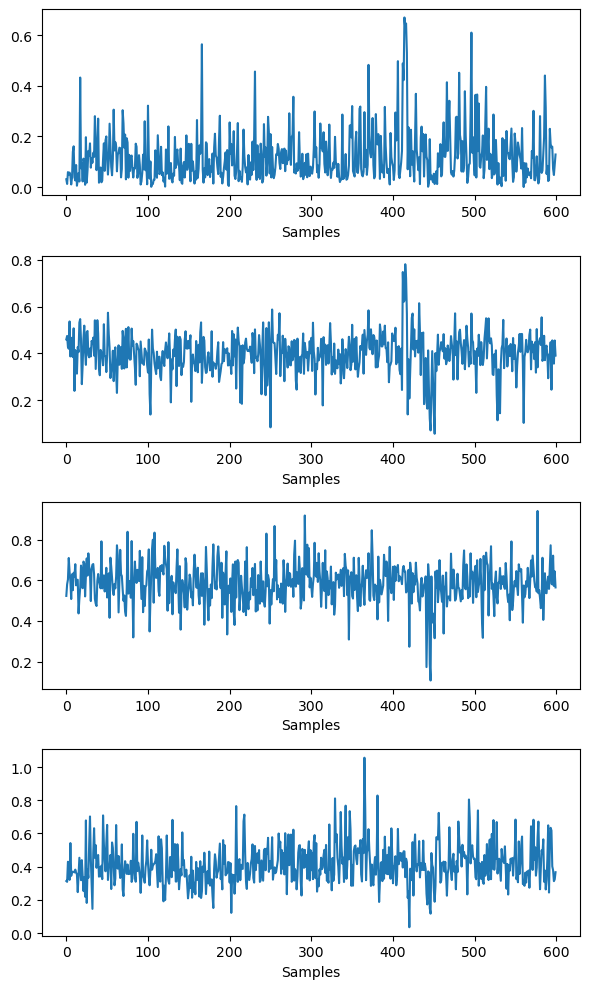

In [61]:
import matplotlib.pyplot as plt
import numpy as np

combined_data = modes  # Example data with shape (6, 1500)

# Calculate sample entropy for every 128 values
window_size = 128
num_windows = combined_data.shape[1] // window_size
sample_entropies = np.zeros((4, num_windows))

for i in range(4):
    for j in range(num_windows):
        start_idx = j * window_size
        end_idx = start_idx + window_size
        window_data = combined_data[i, start_idx:end_idx]
        sample_entropies[i, j] = ant.sample_entropy(window_data)

# Create a figure with subplots
fig, axs = plt.subplots(4, 1, figsize=(6, 10))

# Iterate over the variables and plot sample entropies in subplots
for i in range(4):
    axs[i].plot(sample_entropies[i])
    #axs[i].set_title(f' Sample Entropy {i+1}')
    axs[i].set_xlabel('Samples')
    #axs[i].set_ylabel(f'Samp_ent_mode {i+1}')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


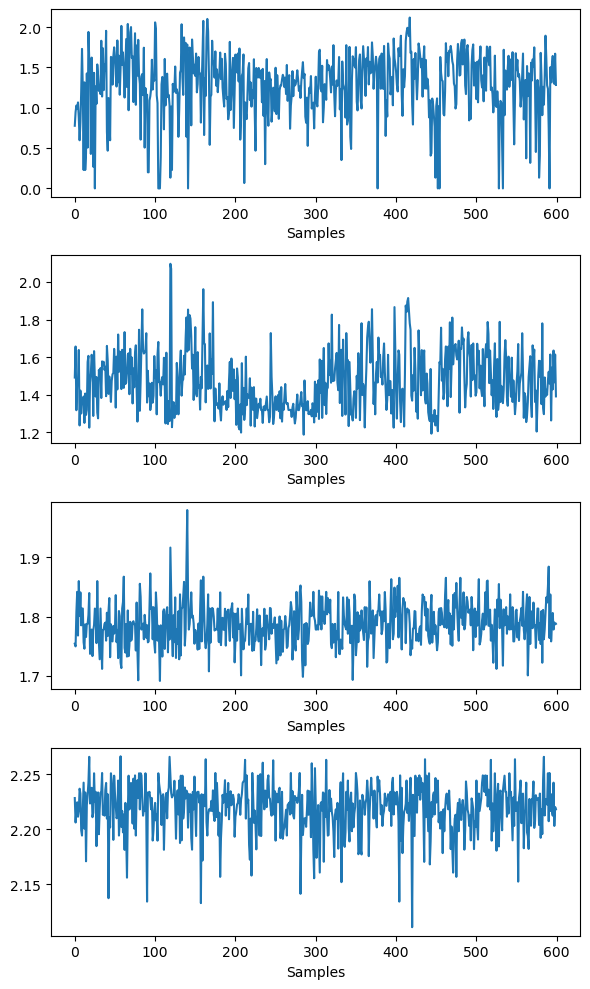

In [62]:
import matplotlib.pyplot as plt
import numpy as np

combined_data = modes  # Example data with shape (6, 1500)

# Calculate sample entropy for every 128 values
window_size = 128
num_windows = combined_data.shape[1] // window_size
sample_entropies = np.zeros((4, num_windows))

for i in range(4):
    for j in range(num_windows):
        start_idx = j * window_size
        end_idx = start_idx + window_size
        window_data = combined_data[i, start_idx:end_idx]
        sample_entropies[i, j] = ant.perm_entropy(window_data)

# Create a figure with subplots
fig, axs = plt.subplots(4, 1, figsize=(6, 10))

# Iterate over the variables and plot sample entropies in subplots
for i in range(4):
    axs[i].plot(sample_entropies[i])
    #axs[i].set_title(f' Permutation Entropy {i+1}')
    axs[i].set_xlabel('Samples')
    #axs[i].set_ylabel(f'Perm_ent_mode {i+1}')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


In [67]:

# coding: utf-8


from vmdpy import VMD
import numpy as np
import math
import matplotlib.pyplot as plt
f_1 = 2.0
f_2 = 24.0
f_3 = 288.0
T=1000
t=np.linspace(1/float(T),1,T,endpoint=True)
pi=np.pi
# print(t)
v_1 =np.cos(2*pi*f_1*t)
v_2 = 1/4.0*np.cos(2*pi*f_2*t)
v_3 = 1/16.0*np.cos(2*pi*f_3*t)
# print(v_1)
# print(v_2)
# print(v_3)
alpha = 2000.0     
tau = 0         
K = 3           
DC = 0         
init = 1         
tol = 1e-7
signal=bpass
(u,u_hat,omega)=VMD(signal, alpha, tau, K, DC, init, tol)
print(u)

[[ 4.20489994  4.2495123   4.30526242 ... 18.59235538 18.55619092
  18.55336802]
 [-2.04292786 -1.94513107 -1.79062963 ... -5.60959022 -5.70493821
  -5.73536317]
 [ 1.11141645  1.01249654  0.76861841 ... -2.79226971 -3.6071104
  -4.01306199]]


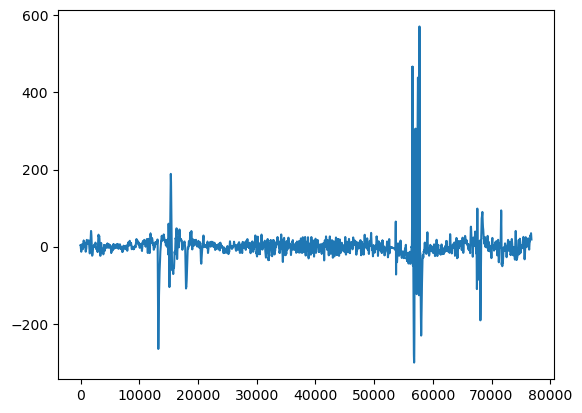

In [68]:
plt.plot(u[0])

-------


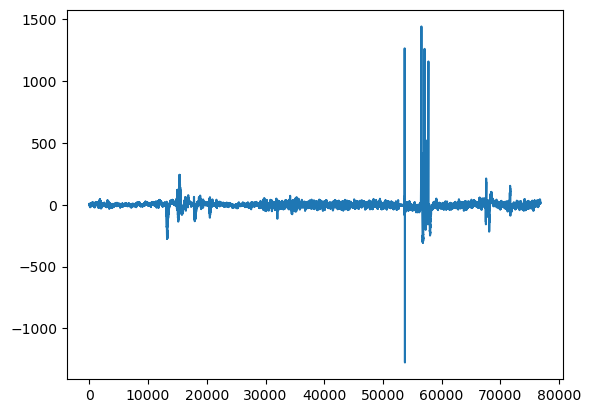

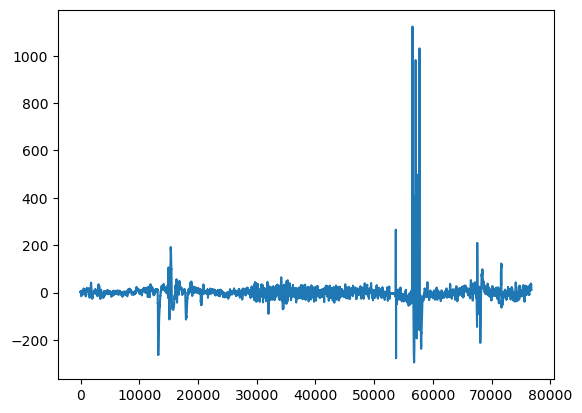

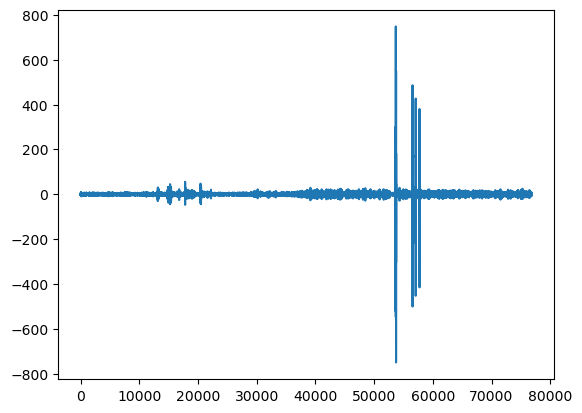

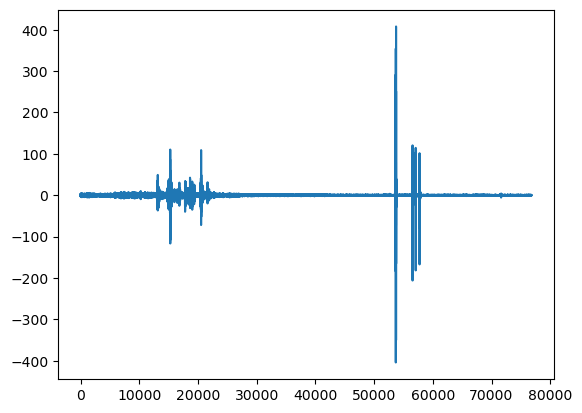

In [72]:
def VMD(signal, alpha, tau, K, DC, init, tol):
    # ---------------------
    #  signal  - the time domain signal (1D) to be decomposed
    #  alpha   - the balancing parameter of the data-fidelity constraint
    #  tau     - time-step of the dual ascent ( pick 0 for noise-slack )
    #  K       - the number of modes to be recovered
    #  DC      - true if the first mode is put and kept at DC (0-freq)
    #  init    - 0 = all omegas start at 0
    #                     1 = all omegas start uniformly distributed
    #                     2 = all omegas initialized randomly
    #  tol     - tolerance of convergence criterion; typically around 1e-6
    #
    #  Output:
    #  -------
    #  u       - the collection of decomposed modes
    #  u_hat   - spectra of the modes
    #  omega   - estimated mode center-frequencies
    #

    import numpy as np
    import math
    import matplotlib.pyplot as plt
    # Period and sampling frequency of input signal
    save_T=len(signal)
    fs=1/float(save_T)

    # extend the signal by mirroring
    T=save_T
    # print(T)
    f_mirror=np.zeros(2*T)
    #print(f_mirror)
    f_mirror[0:T//2]=signal[T//2-1::-1]
    # print(f_mirror)
    f_mirror[T//2:3*T//2]= signal
    # print(f_mirror)
    f_mirror[3*T//2:2*T]=signal[-1:-T//2-1:-1]
    # print(f_mirror)
    f=f_mirror
    # print('f_mirror')
    # print(f_mirror)
    print('-------')

    # Time Domain 0 to T (of mirrored signal)
    T=float(len(f))
    # print(T)
    t=np.linspace(1/float(T),1,int(T),endpoint=True)
    # print(t)

    # Spectral Domain discretization
    freqs=t-0.5-1/T
    # print(freqs)
    # print('-----')
    # Maximum number of iterations (if not converged yet, then it won't anyway)
    N=500

    # For future generalizations: individual alpha for each mode
    Alpha=alpha*np.ones(K,dtype=complex)
    # print(Alpha.shape)
    # print(Alpha)
    # print('-----')

    # Construct and center f_hat
    f_hat=np.fft.fftshift(np.fft.fft(f))
    # print('f_hat')
    # print(f_hat.shape)
    # print(f_hat)
    # print('-----')
    f_hat_plus=f_hat
    f_hat_plus[0:int(int(T)/2)]=0
    # print('f_hat_plus')
    # print(f_hat_plus.shape)
    # print(f_hat_plus)
    # print('-----')
    # matrix keeping track of every iterant // could be discarded for mem
    u_hat_plus=np.zeros((N,len(freqs),K),dtype=complex)
    # print('u_hat_plus')
    # print(u_hat_plus.shape)
    # print(u_hat_plus)
    # print('-----')


    # Initialization of omega_k
    omega_plus=np.zeros((N,K),dtype=complex)
    # print('omega_plus')
    # print(omega_plus.shape)
    # print(omega_plus)
                        
    if (init==1):
        for i in range(1,K+1):
            omega_plus[0,i-1]=(0.5/K)*(i-1)
    elif (init==2):
        omega_plus[0,:]=np.sort(math.exp(math.log(fs))+(math.log(0.5)-math.log(fs))*np.random.rand(1,K))
    else:
        omega_plus[0,:]=0

    if (DC):
        omega_plus[0,0]=0

    # print('omega_plus')
    # print(omega_plus.shape)
    # print(omega_plus)

    # start with empty dual variables
    lamda_hat=np.zeros((N,len(freqs)),dtype=complex)

    # other inits
    uDiff=tol+2.2204e-16 #updata step
    # print('uDiff')
    # print(uDiff)
    # print('----')
    n=1 #loop counter
    sum_uk=0 #accumulator

    T=int(T)


    # ----------- Main loop for iterative updates

    while uDiff > tol and n<N:
        # update first mode accumulator
        k=1
        sum_uk = u_hat_plus[n-1,:,K-1]+sum_uk-u_hat_plus[n-1,:,0]
    #     print('sum_uk')
    #     print(sum_uk)
        #update spectrum of first mode through Wiener filter of residuals
        u_hat_plus[n,:,k-1]=(f_hat_plus-sum_uk-lamda_hat[n-1,:]/2)/(1+Alpha[k-1]*np.square(freqs-omega_plus[n-1,k-1]))
    #     print('u_hat_plus')
    #     print(u_hat_plus.shape)
    #     print(u_hat_plus[n,:,k-1])
    #     print('-----')
        
        

        #update first omega if not held at 0
        if DC==False:
            omega_plus[n,k-1]=np.dot(freqs[T//2:T],np.square(np.abs(u_hat_plus[n,T//2:T,k-1])).T)/np.sum(np.square(np.abs(u_hat_plus[n,T//2:T,k-1])))


        for k in range(2,K+1):

            #accumulator
            sum_uk=u_hat_plus[n,:,k-2]+sum_uk-u_hat_plus[n-1,:,k-1]
    #         print('sum_uk'+str(k))
    #         print(sum_uk)


            #mode spectrum
            u_hat_plus[n,:,k-1]=(f_hat_plus-sum_uk-lamda_hat[n-1,:]/2)/(1+Alpha[k-1]*np.square(freqs-omega_plus[n-1,k-1]))
    #         print('u_hat_plus'+str(k))
    #         print(u_hat_plus[n,:,k-1])
            
            #center frequencies
            omega_plus[n,k-1]=np.dot(freqs[T//2:T],np.square(np.abs(u_hat_plus[n,T//2:T,k-1])).T)/np.sum(np.square(np.abs(u_hat_plus[n,T//2:T:,k-1])))
    #         print('omega_plus'+str(k))
    #         print(omega_plus[n,k-1])
        #Dual ascent
    #     print(u_hat_plus.shape)
        lamda_hat[n,:]=lamda_hat[n-1,:]+tau*(np.sum(u_hat_plus[n,:,:],axis=1)-f_hat_plus)
    #     print('lamda_hat'+str(n))
    #     print(lamda_hat[n,:])

        #loop counter
        n=n+1

        #converged yet?
        uDiff=2.2204e-16

        for i in range(1,K+1):
            uDiff=uDiff+1/float(T)*np.dot(u_hat_plus[n-1,:,i-1]-u_hat_plus[n-2,:,i-1],(np.conj(u_hat_plus[n-1,:,i-1]-u_hat_plus[n-2,:,i-1])).conj().T)

            
        
        uDiff=np.abs(uDiff)
        # print('uDiff')
        # print(uDiff)
        
    # print('f_hat_plus')
    # print(f_hat_plus.shape)
    # print(f_hat_plus)
    # print('-----')   
    # print('u_hat_plus')
    # print(u_hat_plus.shape)
    # print(u_hat_plus)
    # print('-----')
    # print('sum_uk')
    # print(sum_uk)
    # print('-----')
        
    # ------ Postprocessing and cleanup

    # discard empty space if converged early

    N=np.minimum(N,n)
    omega = omega_plus[0:N,:]

    # Signal reconstruction
    u_hat = np.zeros((T,K),dtype=complex)
    u_hat[T//2:T,:]= np.squeeze(u_hat_plus[N-1,T//2:T,:])
    # print('u_hat')
    # print(u_hat.shape)
    # print(u_hat)
    u_hat[T//2:0:-1,:]=np.squeeze(np.conj(u_hat_plus[N-1,T//2:T,:]))
    u_hat[0,:]=np.conj(u_hat[-1,:])
    # print('u_hat')
    # print(u_hat)
    u=np.zeros((K,len(t)),dtype=complex)

    for k in range(1,K+1):
        u[k-1,:]= np.real(np.fft.ifft(np.fft.ifftshift(u_hat[:,k-1])))


    # remove mirror part 
    u=u[:,T//4:3*T//4]

    # print(u_hat.shape)
    #recompute spectrum
    u_hat = np.zeros((T//2,K),dtype=complex)

    for k in range(1,K+1):
        u_hat[:,k-1]=np.fft.fftshift(np.fft.fft(u[k-1,:])).conj().T
        
    # print('-----')
    # print('-----')
    # print(u)
    # print('-----')
    # print(u_hat)
    # print('-----')
    # print(omega)
    plt.plot(signal)
    plt.show()
    for i in range(1,K+1):
        plt.plot(u[i-1,:])
        plt.show()

    return (u,u_hat,omega)

            

(modes, spectrum, omega)=VMD(bpass, 2000, 0.5, K=3, DC=0, init=1, tol=1e-7)

In [87]:
bpass

array([0.72647967, 2.94272905, 2.42145809, ..., 8.67734712, 8.16759216,
       9.5692748 ])

In [88]:
modes

array([[ 2.26927384,  2.29609525,  2.33747583, ..., 11.43957193,
        10.95870151, 10.76463937],
       [-2.6648819 , -1.18911462,  0.89569797, ...,  0.58682934,
        -0.69351877, -1.47375708],
       [-1.77673566,  3.93430769, -3.09856185, ...,  0.44948154,
        -0.96455631,  0.4799403 ]])

In [104]:
modes[0].shape

(76800,)

In [53]:
import numpy as np

def sliding_window(data, window_size, overlap):
    stride = window_size - overlap
    num_windows = (len(data) - window_size) // stride + 1
    windows = np.zeros((num_windows, window_size))
    
    for i in range(num_windows):
        start = i * stride
        end = start + window_size
        windows[i] = data[start:end]
    
    return windows

# EEG data
eeg_data = modes[0]
window_size_eeg = 128
overlap_eeg = 55

# BIS data
bis_data = selected_bis
window_size_bis = 56
overlap_bis = 55

# Apply sliding window to EEG data
eeg_windows = sliding_window(eeg_data, window_size_eeg, overlap_eeg)

# Apply sliding window to BIS data
bis_windows = sliding_window(bis_data, window_size_bis, overlap_bis)

# Print the shapes of the resulting windows
print("EEG windows shape:", eeg_windows.shape)
print("BIS windows shape:", bis_windows.shape)

EEG windows shape: (1051, 128)
BIS windows shape: (545, 56)


In [57]:
rt=np.mean(eeg_windows, axis=1)

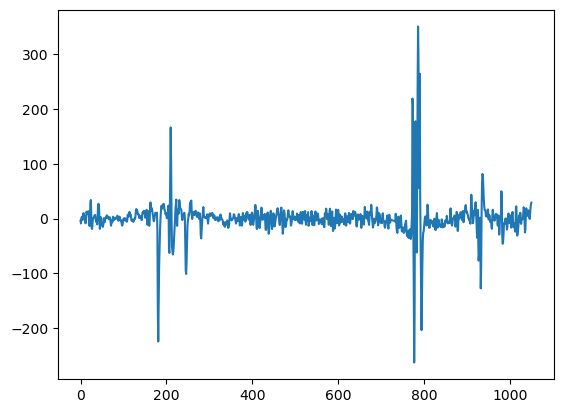

In [58]:
plt.plot(rt)

In [59]:
pd.DataFrame(rt)

,0
0,-3.770235
1,-8.761823
2,0.285311
3,3.007497
4,-1.812606
...,...
1046,-0.575776
1047,10.576380
1048,20.434253
1049,26.806563


In [42]:
modes[0].shape

(76800,)

In [61]:
def moving_sliding_window(data, window_size, overlap):
    # Step 1: Define parameters
    stride = window_size - overlap
    num_windows = (len(data) - window_size) // stride + 1

    # Step 2: Initialize variables
    window_start = 0
    windows = []

    # Step 3: Loop over the windows
    for i in range(num_windows):
        window_end = window_start + window_size
        window = data[window_start:window_end]
        windows.append(window)

        # Step 4: Move the window
        window_start += stride

    return windows


In [72]:
e=moving_sliding_window(modes[0], 56*128, 55*128)
a=np.std(e, axis=1)

In [73]:
a.shape

(545,)

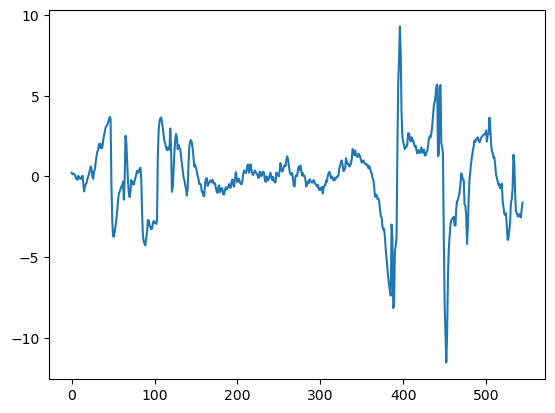

In [74]:
plt.plot(a)

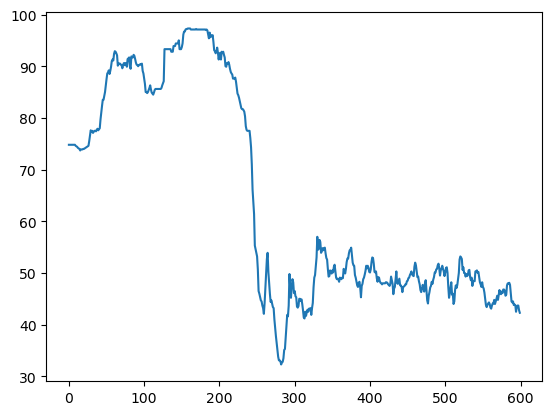

In [75]:
plt.plot(selected_bis)